In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('uber.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [62]:
df = df.sample(n=10000)
df.to_csv('sample.csv', index=False)

In [36]:
import numpy as np

# Define the Haversine formula function
def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the function to calculate the distance between pickup and dropoff
df['haversine_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], 
                                     df['dropoff_longitude'], df['dropoff_latitude'])

In [37]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
118056,19341773,2012-02-13 18:33:00.000000273,6.1,2012-02-13 18:33:00 UTC,-73.981403,40.765582,-73.963897,40.772505,1,1.663121
163332,44252337,2012-04-30 18:05:00.000000203,10.1,2012-04-30 18:05:00 UTC,-73.968270,40.750892,-73.986552,40.750045,1,1.542894
175591,14851286,2013-05-20 11:04:00.00000025,11.5,2013-05-20 11:04:00 UTC,-74.002630,40.749890,-73.981000,40.761750,1,2.249102
49554,19285875,2015-04-12 11:07:27.0000006,13.0,2015-04-12 11:07:27 UTC,-74.000404,40.747150,-73.965164,40.764950,2,3.567613
126457,8401487,2012-11-23 13:42:00.00000061,7.0,2012-11-23 13:42:00 UTC,-73.956438,40.784167,-73.963107,40.791842,2,1.021549


In [44]:
df = df.loc[df['haversine_distance'] < 1000]

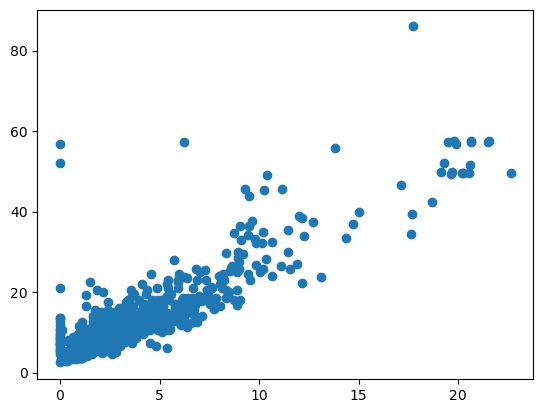

In [45]:
plt.scatter(df['haversine_distance'], df['fare_amount'])

In [41]:
# distance
# fare_amount
# day of the week
# hour of the day

86.0

In [49]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

C:\Users\leeev\AppData\Local\Temp\ipykernel_19316\2655183983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


In [50]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,hour_of_day,hour_normalized,day_of_week
118056,19341773,2012-02-13 18:33:00.000000273,6.1,2012-02-13 18:33:00,-73.981403,40.765582,-73.963897,40.772505,1,1.663121,18,0.750000,0
163332,44252337,2012-04-30 18:05:00.000000203,10.1,2012-04-30 18:05:00,-73.968270,40.750892,-73.986552,40.750045,1,1.542894,18,0.750000,0
175591,14851286,2013-05-20 11:04:00.00000025,11.5,2013-05-20 11:04:00,-74.002630,40.749890,-73.981000,40.761750,1,2.249102,11,0.458333,0
49554,19285875,2015-04-12 11:07:27.0000006,13.0,2015-04-12 11:07:27,-74.000404,40.747150,-73.965164,40.764950,2,3.567613,11,0.458333,6
126457,8401487,2012-11-23 13:42:00.00000061,7.0,2012-11-23 13:42:00,-73.956438,40.784167,-73.963107,40.791842,2,1.021549,13,0.541667,4


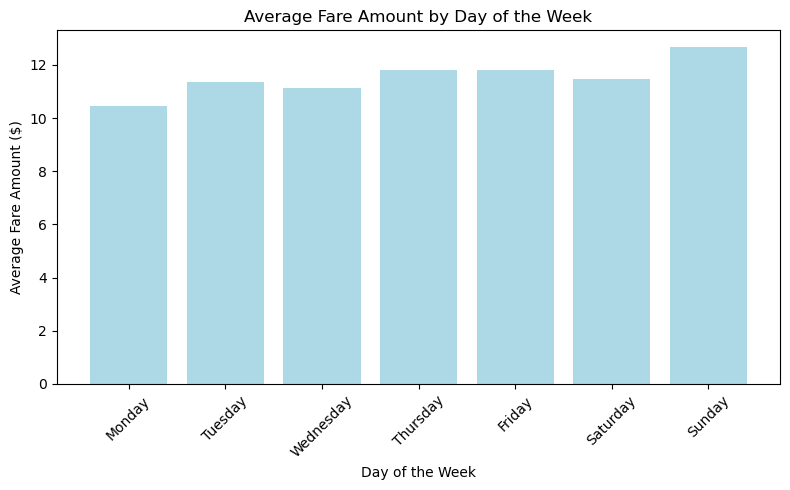

In [57]:
avg_fare_per_day = df.groupby('day_of_week')['fare_amount'].mean().reset_index()

# Step 3: Plotting the average fare by day of the week
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_day['day_name'] = avg_fare_per_day['day_of_week'].map(day_map)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_fare_per_day['day_name'], avg_fare_per_day['fare_amount'], color='lightblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()